In [114]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
plt.style.use("ggplot")

In [104]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [105]:
train_X_1 = train_X[train_y == 1]
train_X_0 = train_X[train_y == 0]

train_y_1 = train_y[train_y == 1].reshape(-1, 1)
train_y_0 = train_y[train_y == 0].reshape(-1, 1)


test_X_1 = test_X[test_y == 1]
test_X_0 = test_X[test_y == 0]

test_y_1 = test_y[test_y == 1].reshape(-1, 1)
test_y_0 = test_y[test_y == 0].reshape(-1, 1)


train_X_01 = np.vstack((train_X_1, train_X_0))
train_y_01 = np.vstack((train_y_1, train_y_0))
test_X_01 = np.vstack((test_X_1, test_X_0))
test_y_01 = np.vstack((test_y_1, test_y_0))

In [106]:
print(f"Train X shape: {train_X_01.shape}" )
print(f"Train y shape: {train_y_01.shape}" )
print(f"Test X shape: {test_X_01.shape}" )
print(f"Test y shape: {test_y_01.shape}" )

Train X shape: (12665, 28, 28)
Train y shape: (12665, 1)
Test X shape: (2115, 28, 28)
Test y shape: (2115, 1)


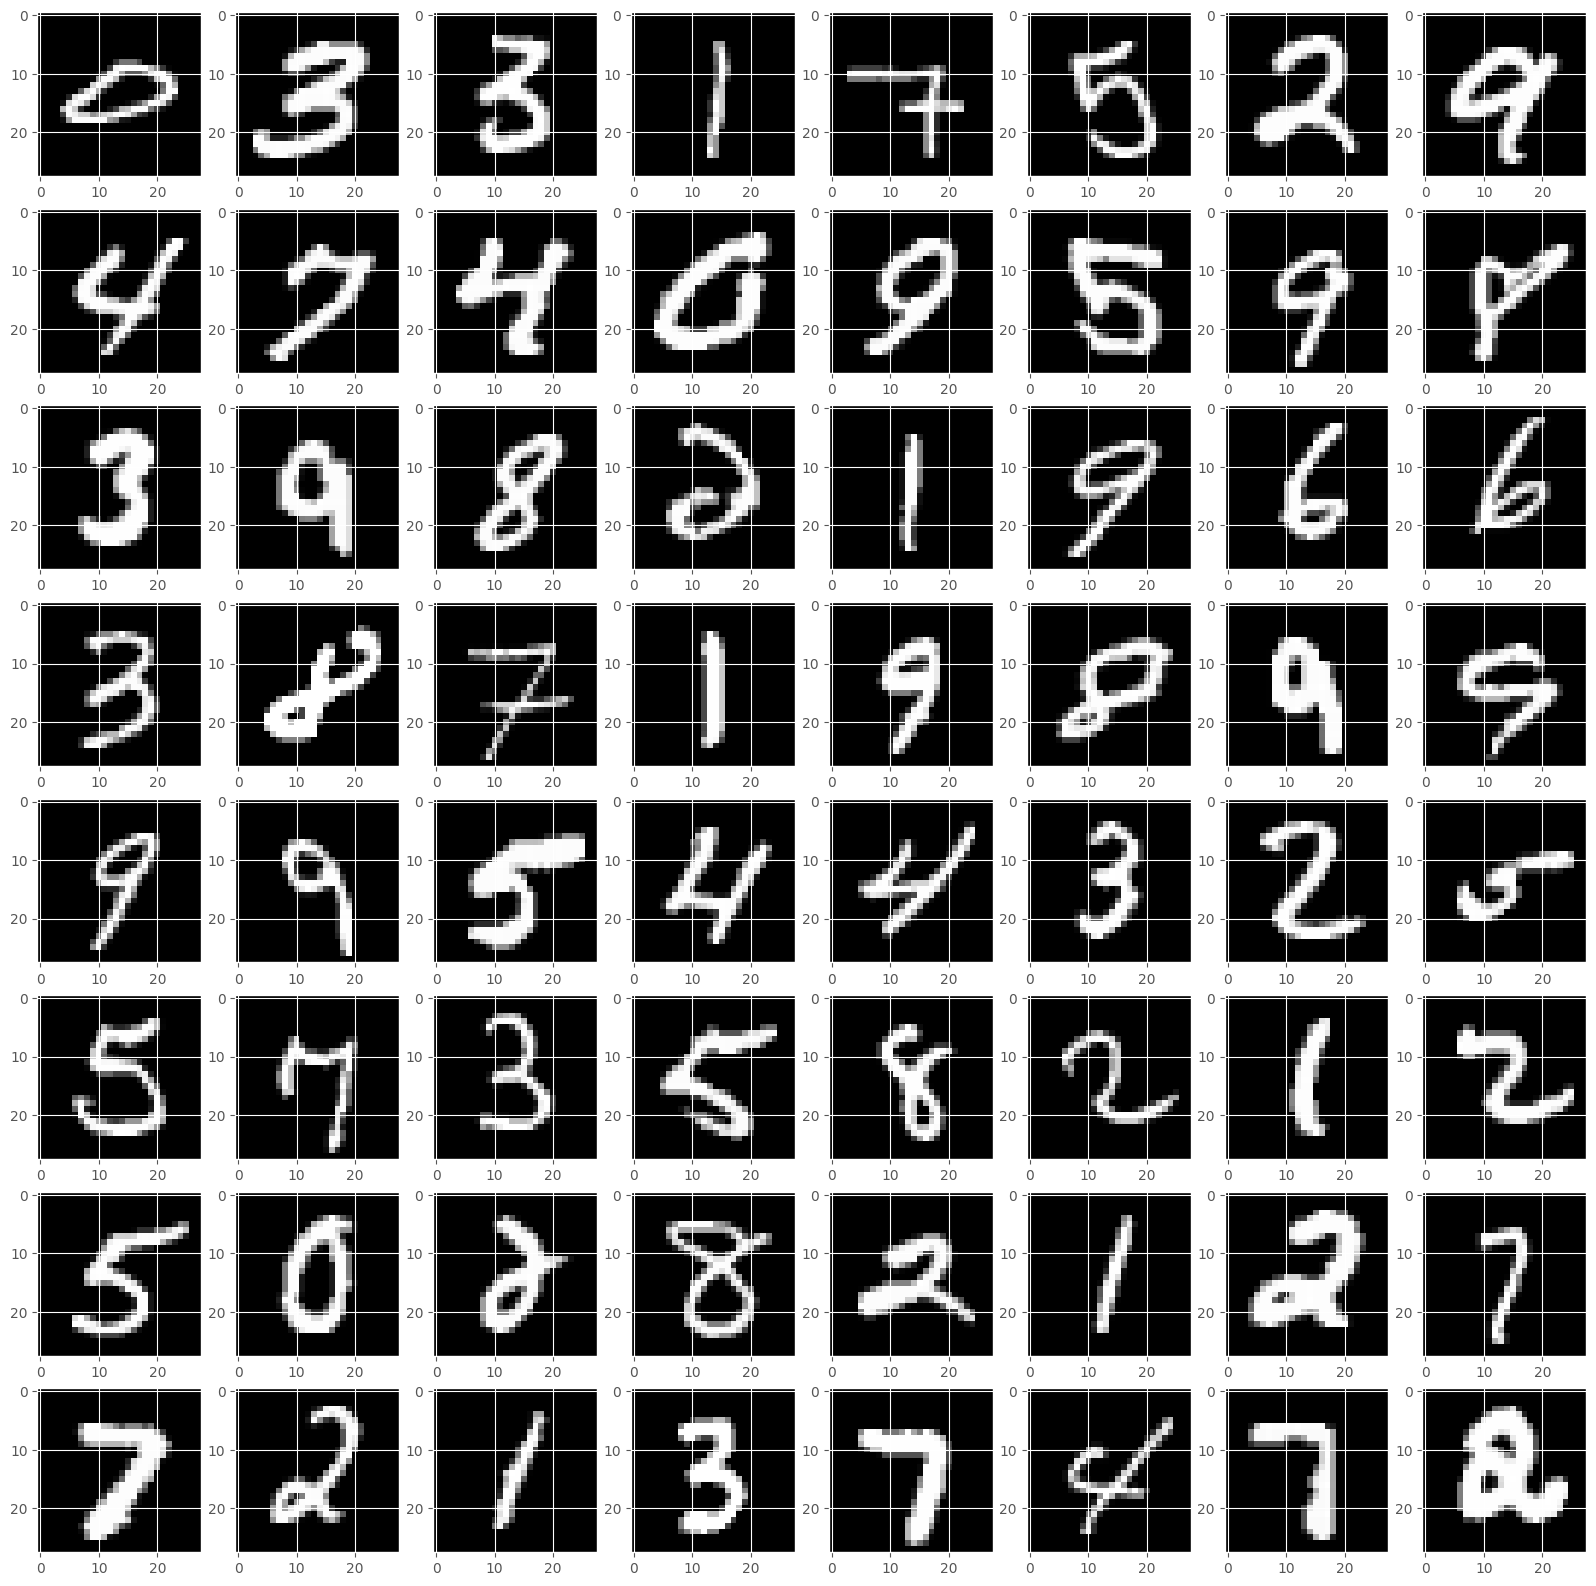

In [78]:
fig, ax = plt.subplots(8, 8, figsize=(20, 20))

for i in range(8):
  for j in range(8):
    random_index = random.randint(0, 59999)
    sample = train_X[random_index]
    ax[i][j].imshow(sample, cmap="gray")

In [83]:
dig_recog_model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28), name="input"),          # Flatten 28x28 images
        tf.keras.layers.Dense(units=128, activation="sigmoid", name="l1"),
        tf.keras.layers.Dense(units=64, activation="sigmoid", name="l2"),
        tf.keras.layers.Dense(units=32, activation="sigmoid", name="l3"),
        tf.keras.layers.Dense(units=1, activation="sigmoid", name="output"),  # Binary classification
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
dig_recog_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [119]:
history = dig_recog_model.fit(train_X_01, train_y_01, epochs=20)

Epoch 1/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9999 - loss: 2.2911e-04
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9998 - loss: 4.3431e-04
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 2.6891e-04
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 2.0173e-04
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9999 - loss: 3.0879e-04
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 4.2471e-04
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9998 - loss: 2.5862e-04
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 1.4306e-04
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9997 - loss: 5.0899e-04
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.0790e-05
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 8.5614e-05
Epoch 12

In [131]:
test_loss, test_acc = dig_recog_model.evaluate(test_X_01, test_y_01)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 7.9535e-04


0.9990543723106384

Text(0, 0.5, 'loss')

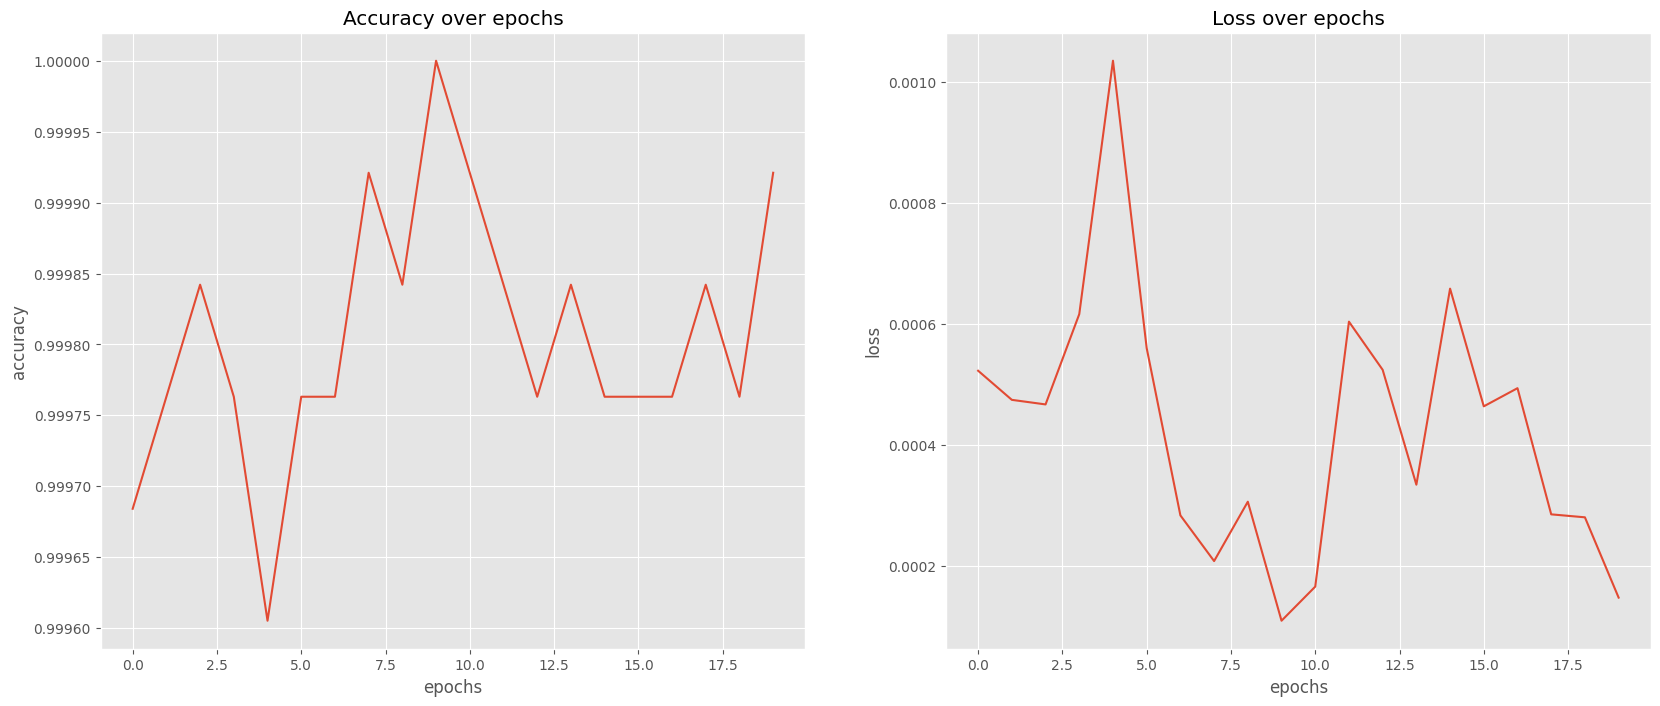

In [133]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(np.arange(20), history.history["accuracy"])
ax[0].set_title("Accuracy over epochs")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accuracy")
ax[1].plot(np.arange(20), history.history["loss"])
ax[1].set_title("Loss over epochs")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("loss")

In [139]:
pred = dig_recog_model.predict(test_X_01)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


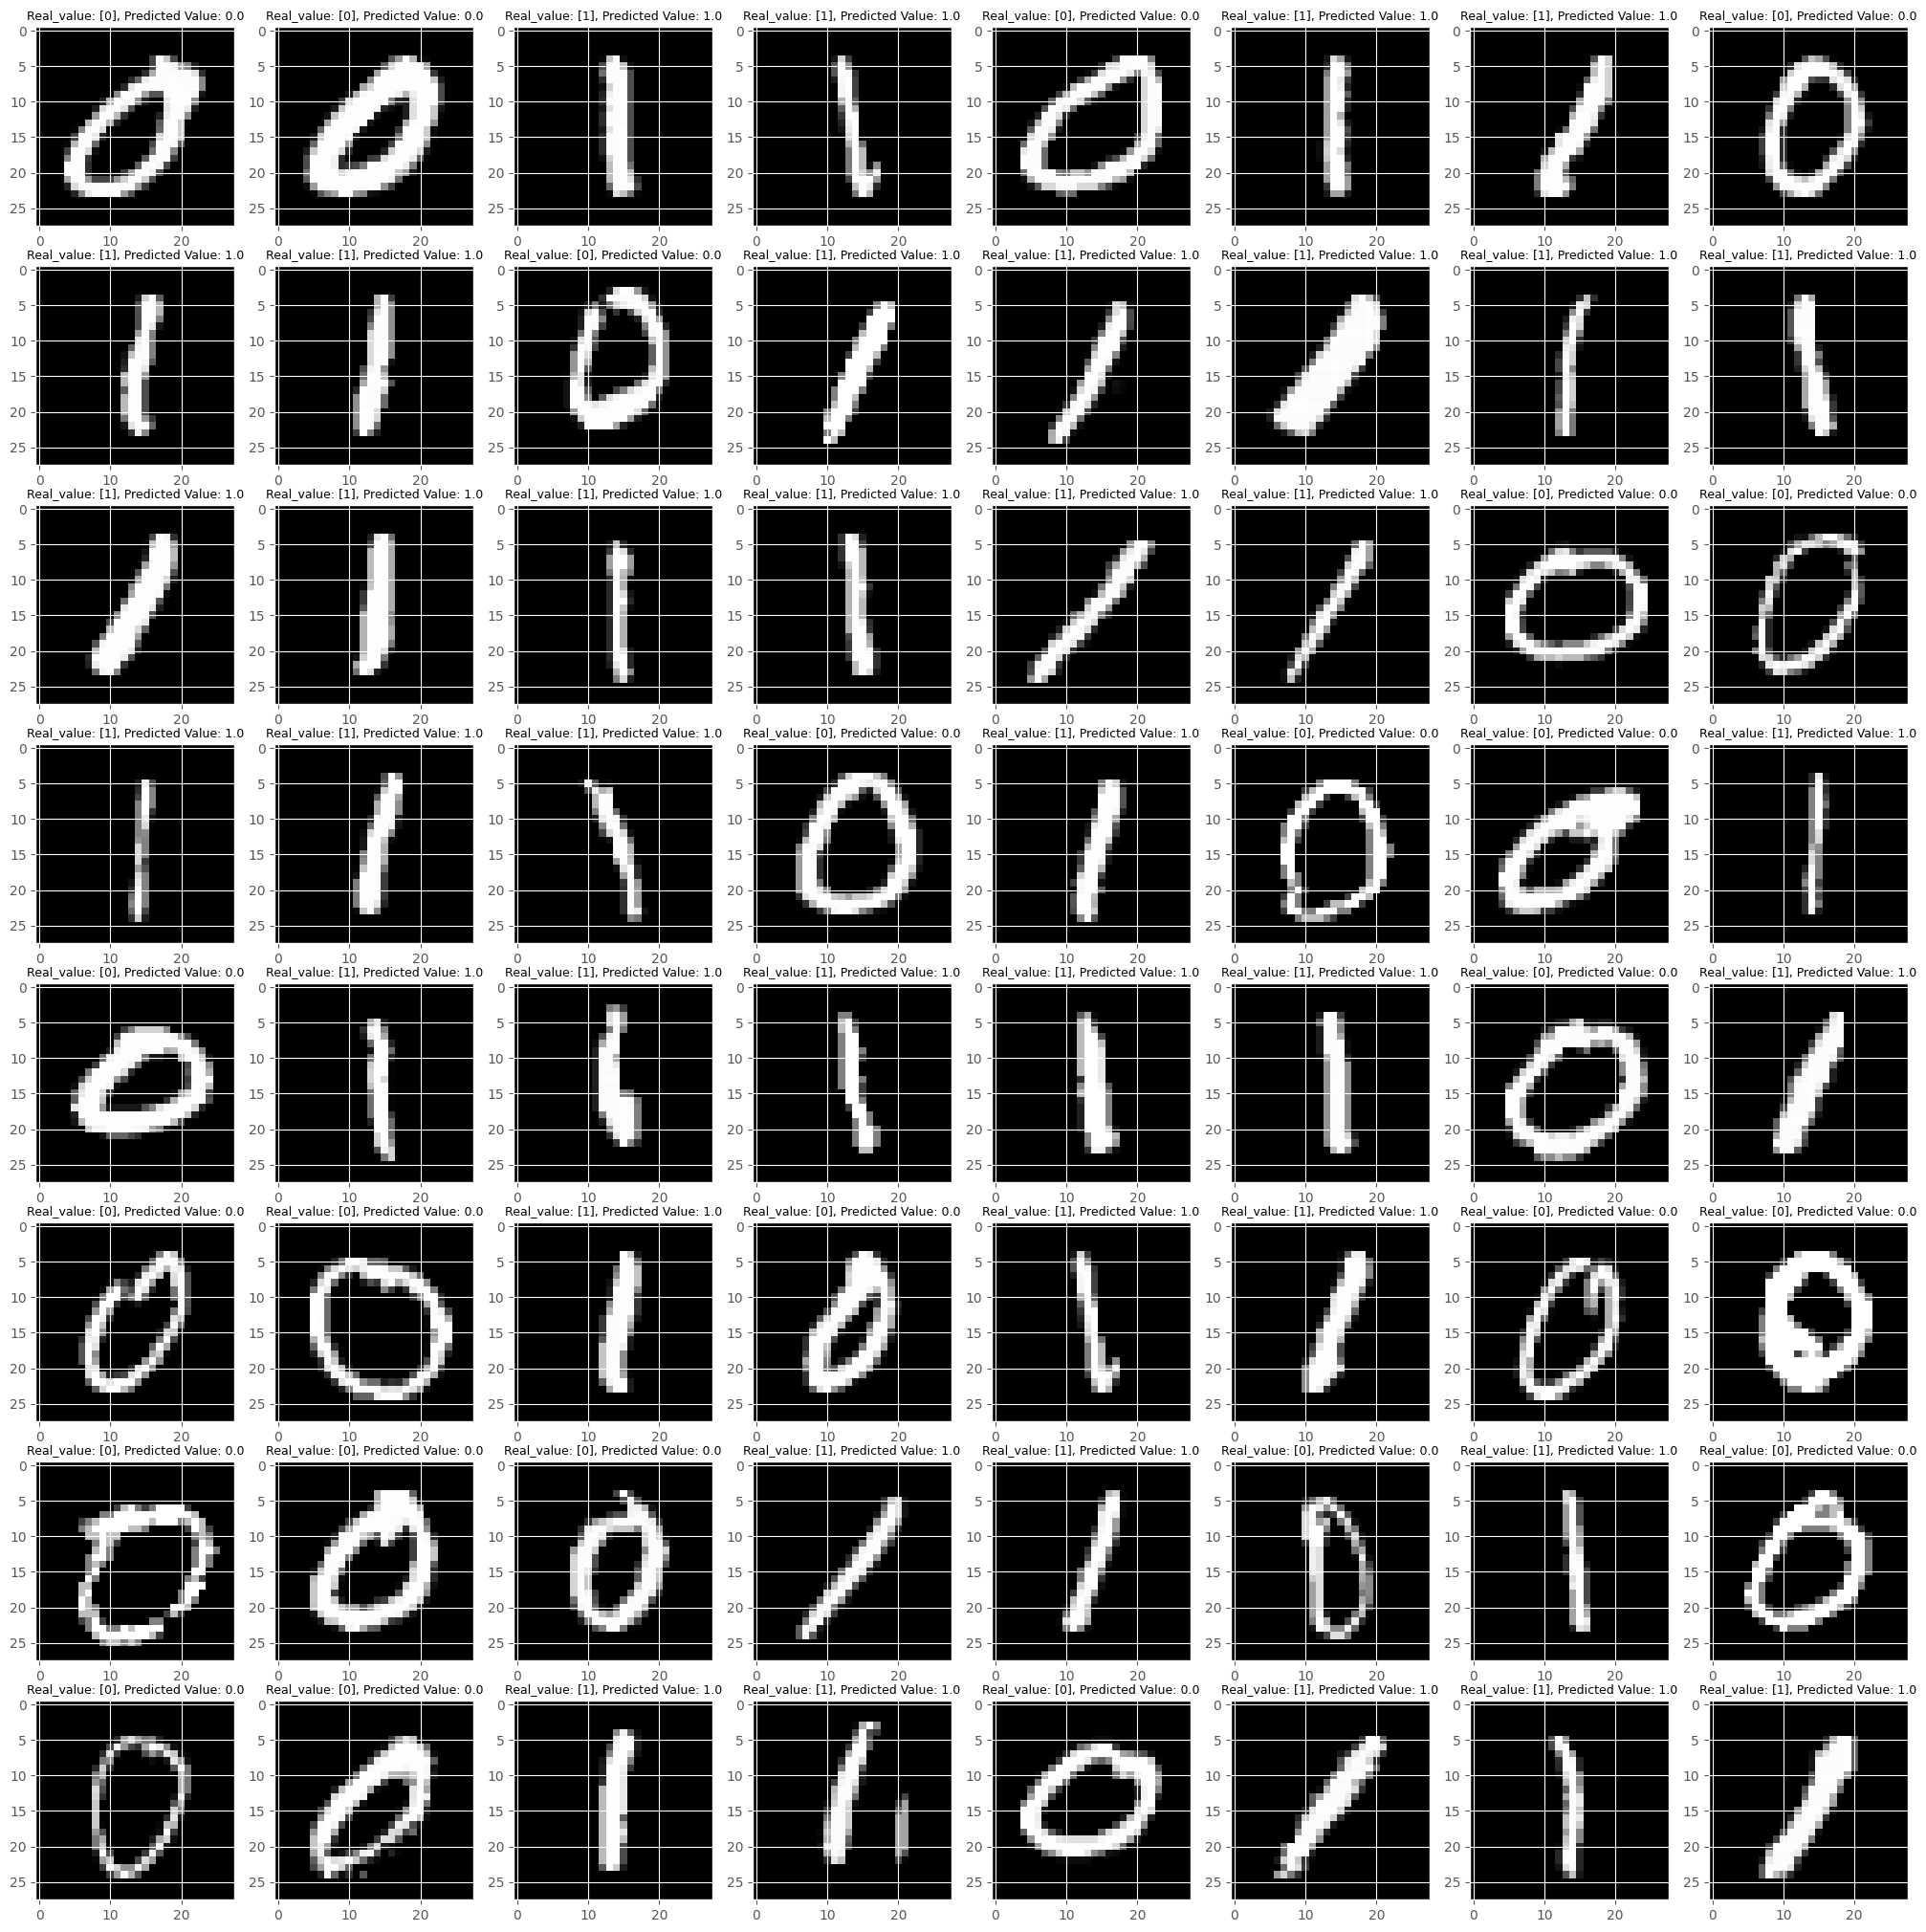

In [146]:
fig, ax = plt.subplots(8, 8, figsize=(20, 20))

for i in range(8):
  for j in range(8):
    random_index = random.randint(0, 2115)
    sample = test_X_01[random_index]
    ax[i][j].imshow(sample, cmap="gray")
    ax[i][j].set_title(f"Real_value: {test_y_01[random_index]}, Predicted Value: {pred[random_index][0]}", fontsize=9)

fig.tight_layout(pad=0,w_pad=0, h_pad=0)
